# Matplotlib Tutorial
src: https://www.dataquest.io/blog/matplotlib-tutorial/
Exploring tweets with Pandas
Before we get started with plotting, let’s load in the data and do some basic exploration. We can use Pandas, a Python library for data analysis, to help us with this. In the below code, we’ll:

Import the Pandas library.
Read tweets.csv into a Pandas DataFrame.
Print the first 5 rows of the DataFrame.

In [2]:
import pandas as pd
tweets = pd.read_csv("tweets.csv")
tweets.head()


,id,id_str,user_location,user_bg_color,retweet_count,user_name,polarity,created,geo,user_description,user_created,user_followers,coordinates,subjectivity,text
0,1,729828033092149248,Wheeling WV,022330,0,Jaybo26003,0.00,2016-05-10T00:18:57,NaN,NaN,2011-11-17T02:45:42,39,NaN,0.0,Make a difference vote! WV Bernie Sanders Coul...
1,2,729828033092161537,NaN,C0DEED,0,brittttany_ns,0.15,2016-05-10T00:18:57,NaN,18 // PSJAN,2012-12-24T17:33:12,1175,NaN,0.1,RT @HlPHOPNEWS: T.I. says if Donald Trump wins...
2,3,729828033566224384,NaN,C0DEED,0,JeffriesLori,0.00,2016-05-10T00:18:57,NaN,NaN,2012-10-11T14:29:59,42,NaN,0.0,You have no one to blame but yourselves if Tru...
3,4,729828033893302272,global,C0DEED,0,WhorunsGOVs,0.00,2016-05-10T00:18:57,NaN,Get Latest Global Political news as they unfold,2014-02-16T07:34:24,290,NaN,0.0,'Ruin the rest of their lives': Donald Trump c...
4,5,729828034178482177,"California, USA",131516,0,BJCG0830,0.00,2016-05-10T00:18:57,NaN,Queer Latino invoking his 1st amendment privil...,2009-03-21T01:43:26,354,NaN,0.0,"RT @elianayjohnson: Per source, GOP megadonor ..."


In [3]:
def get_candidate(row):
    candidates=[]
    text = row["text"].lower()
    if "clinton" in text or "hillary" in text:
        candidates.append("clinton")
    if "trump" in text or "donald" in text:
        candidates.append("trump")
    if "sanders" in text or "bernie" in text:
        candidates.append("sanders")
    return ",".join(candidates)
tweets["candidate"] = tweets.apply(get_candidate,axis=1)
import matplotlib.pyplot as plt
import numpy as np

trump                    119998
clinton,trump             30521
                          25429
sanders                   25351
clinton                   22746
clinton,sanders            6044
clinton,trump,sanders      4219
trump,sanders              3172
Name: candidate, dtype: int64


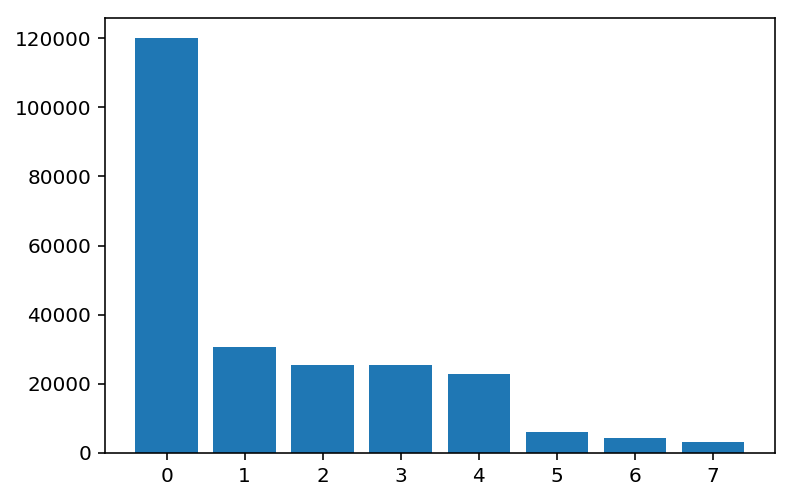

trump                    119998
clinton,trump             30521
                          25429
sanders                   25351
clinton                   22746
clinton,sanders            6044
clinton,trump,sanders      4219
trump,sanders              3172
Name: candidate, dtype: int64


In [13]:
counts = tweets["candidate"].value_counts()
#print(tweets["text"])
#print(tweets["candidate]) shows the candidates mentioned per tweet
print(counts)
#full hd 4k graphics
%config InlineBackend.figure_format = 'retina'
#plt.scatter(range(len(counts)), counts) also can use scatter graph
plt.bar(range(len(counts)), counts)
plt.show()

print(counts)

## Customizing plots
Now that we’ve made a basic first plot, we can move on to creating a more customized second plot. We’ll make a basic histogram, then modify it to add labels and other information.

One of the things we can look at is the age of the user accounts that are tweeting. We’ll be able to find if there differences in when the accounts of users who tweet about Trump and when the accounts of users who tweet about Clinton were created. One candidate having more user accounts created recently might imply some kind of manipulation of Twitter with fake accounts.

In the code below, we’ll:

* Convert the created and user_created columns to the Pandas datetime type.
* Create a user_age column that is the number of days since the account was created.
* Create a histogram of user ages.
* Show the histogram.

0         5.580306
1         4.474508
2         4.677596
3         3.327702
4         8.240698
5         4.615784
6         1.805444
7         1.945152
8         7.534150
9         4.353651
10        1.237867
11        8.188900
12        7.128995
13        3.295090
14        4.665862
15        2.492999
16        6.887083
17        1.702065
18        1.950158
19        1.375719
20        1.539880
21        1.165034
22        3.750511
23        1.303780
24        6.057846
25        1.335061
26        1.682968
27        7.367835
28        6.937803
29        1.427044
            ...   
237450    7.958371
237451    1.261428
237452    5.395281
237453    5.712628
237454    5.615958
237455    4.569078
237456    3.219263
237457    6.143615
237458    5.271985
237459    8.134904
237460    1.191086
237461    5.233322
237462    2.179143
237463    5.696052
237464    3.696511
237465    5.171371
237466    1.219529
237467    6.185284
237468    8.827109
237469    4.003831
237470    1.559604
237471    9.

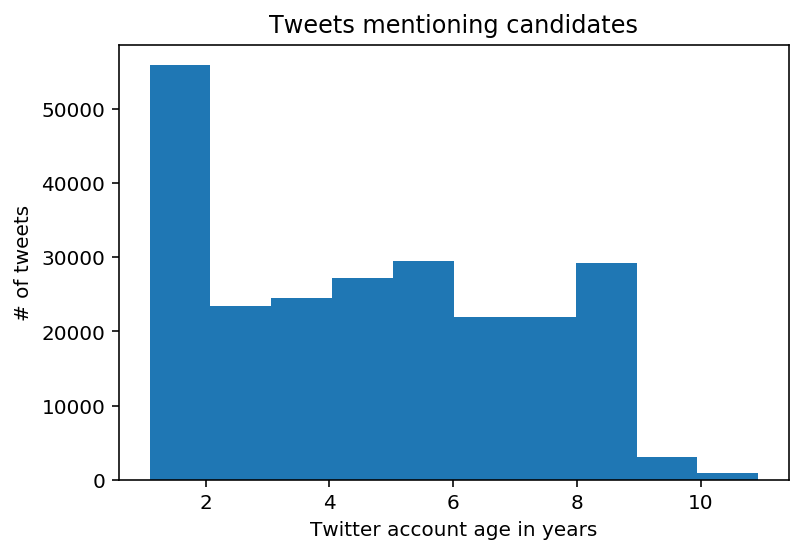

In [18]:
from datetime import datetime
tweets["created"] = pd.to_datetime(tweets["created"])
tweets["user_created"] = pd.to_datetime(tweets["user_created"])
tweets["user_age"] = tweets["user_created"].apply(lambda x: (datetime.now() - x).total_seconds() / 3600 / 24 / 365)

%config InlineBackend.figure_format = 'retina'
plt.hist(tweets["user_age"])
plt.title("Tweets mentioning candidates")
plt.xlabel("Twitter account age in years")
plt.ylabel("# of tweets")
plt.show()


## Making a stacked histogram
The current histogram does a nice job of telling us the account age of all tweeters, but it doesn’t break it down by candidate, which might be more interesting. We can leverage the additional options in the hist method to create a stacked histogram.

#### In the below code, we’ll:

* Generate three Pandas series, each containing the user_age data only for tweets about a certain candidate.
* Make a stacked histogram by calling the hist method with additional options.
* Specifying a list as the input will plot three sets of histogram bars.
* Specifying stacked=True will stack the three sets of bars.
* Adding the label option will generate the correct labels for the legend.
* Call the plt.legend method to draw a legend in the top right corner.
* Add a title, x axis, and y axis labels.
* Show the plot.

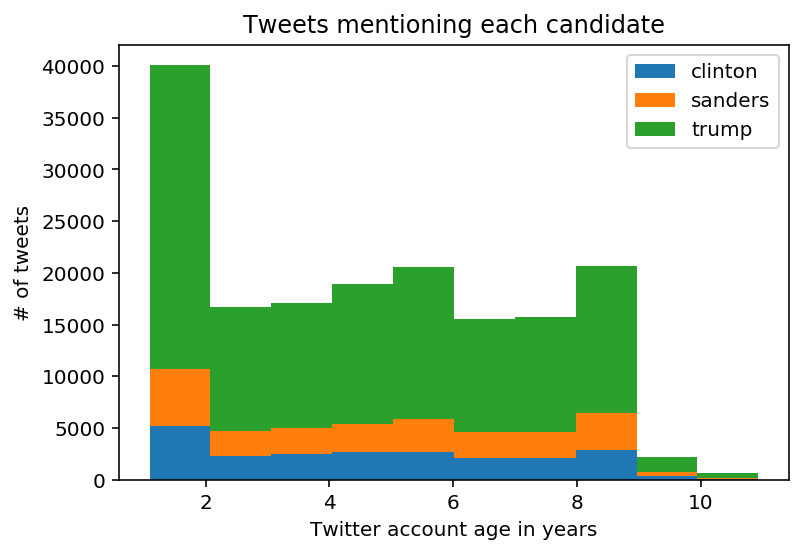

In [17]:
cl_tweets = tweets["user_age"][tweets["candidate"] == "clinton"]
sa_tweets = tweets["user_age"][tweets["candidate"] == "sanders"]
tr_tweets = tweets["user_age"][tweets["candidate"] == "trump"]
plt.hist([
        cl_tweets, 
        sa_tweets, 
        tr_tweets
    ], 
    stacked=True, 
    label=["clinton", "sanders", "trump"]
)
plt.legend()
plt.title("Tweets mentioning each candidate")
plt.xlabel("Twitter account age in years")
plt.ylabel("# of tweets")
plt.show()

## Annotating the histogram
We can take advantage of matplotlibs ability to draw text over plots to add annotations. Annotations point to a specific part of the chart, and let us add a snippet describing something to look at.

In the code below, we’ll make the same histogram as we did above, but we’ll call the plt.annotate method to add an annotation to the plot.

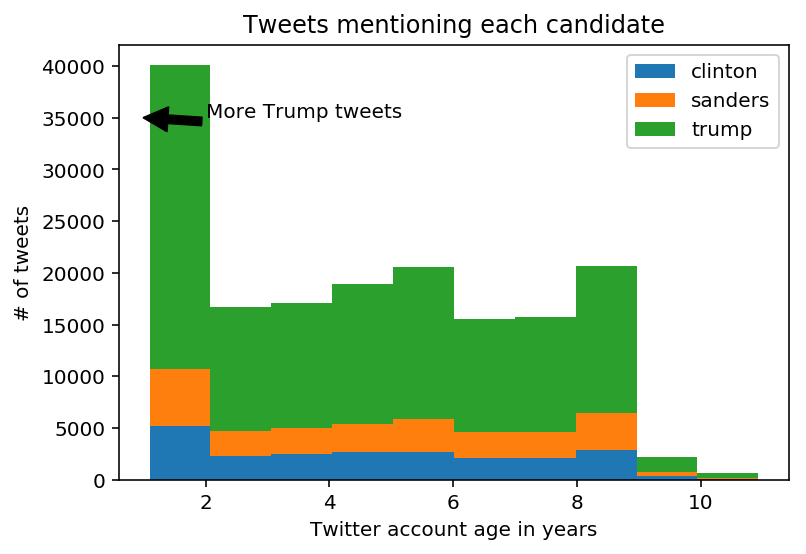

In [19]:
plt.hist([
        cl_tweets, 
        sa_tweets, 
        tr_tweets
    ], 
    stacked=True, 
    label=["clinton", "sanders", "trump"]
)
plt.legend()
plt.title("Tweets mentioning each candidate")
plt.xlabel("Twitter account age in years")
plt.ylabel("# of tweets")
plt.annotate('More Trump tweets', xy=(1, 35000), xytext=(2, 35000),
            arrowprops=dict(facecolor='black'))
plt.show()

## Extracting colors
We’ll generate 4 plots that show the amount of the colors red and blue in the Twitter background colors of users tweeting about Trump. This may show if tweeters who identify as Republican are more likely to put red in their profile.

First, we’ll generate two columns, red and blue, that tell us how much of each color is in each tweeter’s profile background, from 0 to 1.

In the code below, we’ll:

* Use the apply method to go through each row in the user_bg_color column, and extract how much red is in it.
* Use the apply method to go through each row in the user_bg_color column, and extract how much blue is in it.

In [20]:
import matplotlib.colors as colors

tweets["red"] = tweets["user_bg_color"].apply(lambda x: colors.hex2color('#{0}'.format(x))[0])
tweets["blue"] = tweets["user_bg_color"].apply(lambda x: colors.hex2color('#{0}'.format(x))[2])


## Creating the plot
Once we have the data setup, we can create the plots. Each plot will be a histogram showing how many tweeters have a profile background containing a certain amount of blue or red.

In the below code, we:

* Generate a Figure and multiple Axes with the subplots method. The axes will be returned as an array.
* The axes are returned in a 2x2 NumPy array. We extract each individual Axes object by using the flat property of arrays. This gives us 4 Axes objects we can work with.
* Plot a histogram in the first Axes using the hist method.
* Set the title of the first Axes to Red in all backgrounds using the set_title method. This performs the same function as plt.title.
* Plot a histogram in the second Axes using the hist method.
* Set the title of the second Axes to Red in Trump tweeters using the set_title method.
* Plot a histogram in the third Axes using the hist method.
* Set the title of the third Axes to Blue in all backgrounds using the set_title method. This performs the same function as plt.title.
* Plot a histogram in the fourth Axes using the hist method.
* Set the title of the fourth Axes to Blue in Trump tweeters using the set_title method.
* Call the plt.tight_layout method to reduce padding in the graphs and fit all the elements.
* Show the plot.


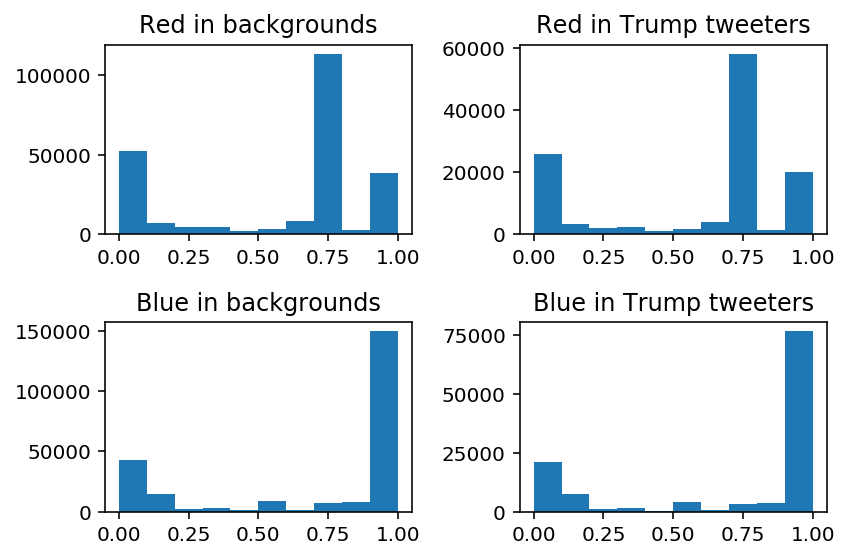

In [21]:
fig, axes = plt.subplots(nrows=2, ncols=2)
ax0, ax1, ax2, ax3 = axes.flat

ax0.hist(tweets["red"])
ax0.set_title('Red in backgrounds')

ax1.hist(tweets["red"][tweets["candidate"] == "trump"].values)
ax1.set_title('Red in Trump tweeters')

ax2.hist(tweets["blue"])
ax2.set_title('Blue in backgrounds')

ax3.hist(tweets["blue"][tweets["candidate"] == "trump"].values)
ax3.set_title('Blue in Trump tweeters')

plt.tight_layout()
plt.show()

In [22]:
tweets["user_bg_color"].value_counts()

C0DEED    108977
000000     31119
F5F8FA     25597
131516      7731
1A1B1F      5059
022330      4300
0099B9      3958
642D8B      3767
FFFFFF      3101
9AE4E8      2651
ACDED6      2383
352726      2338
C6E2EE      1978
709397      1518
EBEBEB      1475
FF6699      1370
BADFCD      1336
FFF04D      1300
EDECE9      1225
B2DFDA      1218
DBE9ED      1113
ABB8C2      1101
8B542B      1073
3B94D9       623
89C9FA       414
DD2E44       351
94D487       318
4A913C       300
9266CC       287
F5ABB5       267
           ...  
2CDEC9         1
958CDB         1
EDE6ED         1
595665         1
F5A6D7         1
9898C6         1
E61291         1
BCC4D1         1
010004         1
001299         1
633D14         1
DFBADE         1
B3EDAD         1
10100E         1
DEDCE0         1
7A0099         1
50851F         1
EBBD6F         1
0E76BC         1
A4AAAD         1
F4F5F0         1
F2BDD9         1
136A70         1
050A3D         1
333133         1
00517A         1
0E1B40         1
1D4C7A        

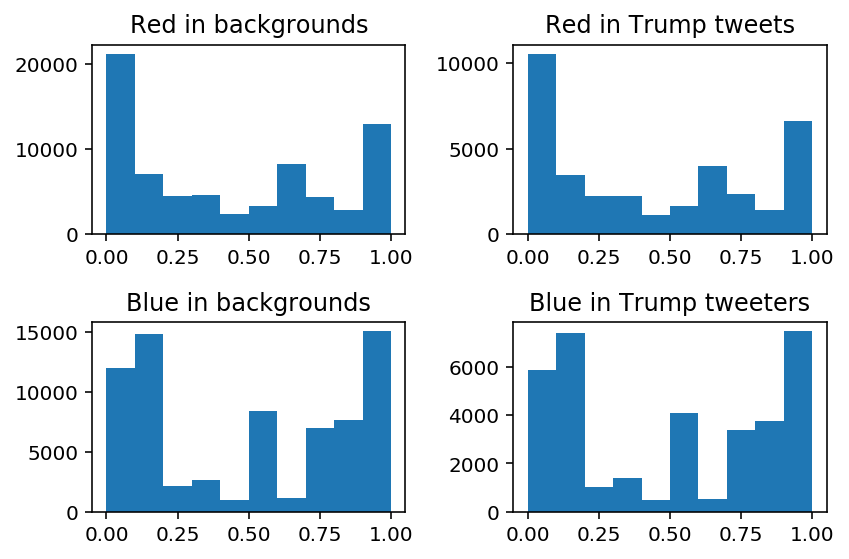

In [23]:
tc = tweets[~tweets["user_bg_color"].isin(["C0DEED", "000000", "F5F8FA"])]

def create_plot(data):
    fig, axes = plt.subplots(nrows=2, ncols=2)
    ax0, ax1, ax2, ax3 = axes.flat

    ax0.hist(data["red"])
    ax0.set_title('Red in backgrounds')

    ax1.hist(data["red"][data["candidate"] == "trump"].values)
    ax1.set_title('Red in Trump tweets')

    ax2.hist(data["blue"])
    ax2.set_title('Blue in backgrounds')

    ax3.hist(data["blue"][data["candidate"] == "trump"].values)
    ax3.set_title('Blue in Trump tweeters')

    plt.tight_layout()
    plt.show()

create_plot(tc)

## Plotting sentiment
We generated sentiment scores for each tweet using TextBlob, which are stored in the polarity column. We can plot the mean value for each candidate, along with the standard deviation. The standard deviation will tell us how wide the variation is between all the tweets, whereas the mean will tell us how the average tweet is.

In order to do this, we can add 2 Axes to a single Figure, and plot the mean of polarity in one, and the standard deviation in the other. Because there are a lot of text labels in these plots, we’ll need to increase the size of the generated figure to match. We can do this with the figsize option in the plt.subplots method.

The code below will:

* Group tweets by candidate, and compute the mean and standard deviation for each numerical column (including polarity).
* Create a Figure that’s 7 inches by 7 inches, with 2 Axes objects, arranged vertically.
* Create a bar plot of the standard deviation the first Axes object.
* Set the tick labels using the set_xticklabels method, and rotate the labels 45 degrees using the rotation argument.
* Set the title.
* Create a bar plot of the mean on the second Axes object.
* Set the tick labels.
* Set the title.
* Show the plot.


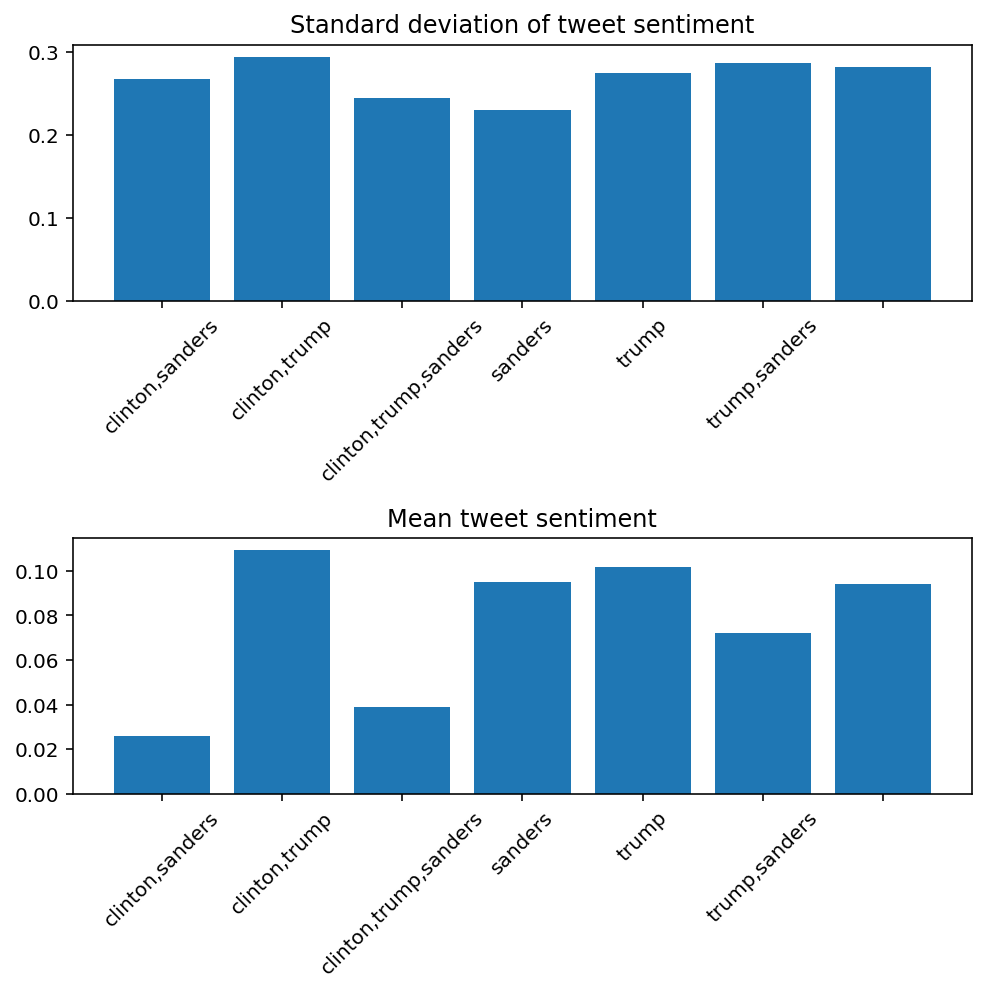

In [24]:
gr = tweets.groupby("candidate").agg([np.mean, np.std])

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(7, 7))
ax0, ax1 = axes.flat

std = gr["polarity"]["std"].iloc[1:]
mean = gr["polarity"]["mean"].iloc[1:]
ax0.bar(range(len(std)), std)
ax0.set_xticklabels(std.index, rotation=45)
ax0.set_title('Standard deviation of tweet sentiment')

ax1.bar(range(len(mean)), mean)
ax1.set_xticklabels(mean.index, rotation=45)
ax1.set_title('Mean tweet sentiment')

plt.tight_layout()
plt.show()

## Generating a side by side bar plot
We can plot tweet length by candidate using a bar plot. We’ll first split the tweets into short, medium, and long tweets. Then, we’ll count up how many tweets mentioning each candidate fall into each group. Then, we’ll generate a bar plot with bars for each candidate side by side.

### Generating tweet lengths
To plot the tweet lengths, we’ll first have to categorize the tweets, then figure out how many tweets by each candidate fall into each bin.

In the code below, we’ll:

* Define a function to mark a tweet as short if it’s less than 100 characters, medium if it’s 100 to 135 characters, and long if it’s over 135 characters.
* Use apply to generate a new column tweet_length.
* Figure out how many tweets by each candidate fall into each group.

In [25]:
def tweet_lengths(text):
    if len(text) < 100:
        return "short"
    elif 100 <= len(text) <= 135:
        return "medium"
    else:
        return "long"

tweets["tweet_length"] = tweets["text"].apply(tweet_lengths)

tl = {}
for candidate in ["clinton", "sanders", "trump"]:
    tl[candidate] = tweets["tweet_length"][tweets["candidate"] == candidate].value_counts()


## Plotting
Now that we have the data we want to plot, we can generate our side by side bar plot. We’ll use the bar method to plot the tweet lengths for each candidate on the same axis. However, we’ll use an offset to shift the bars to the right for the second and third candidates we plot. This will give us three category areas, short, medium, and long, with one bar for each candidate in each area.

In the code below, we:

* Create a Figure and a single Axes object.
* Define the width for each bar, .5.
* Generate a sequence of values, x, that is 0, 2, 4. Each value is the start of a category, such as short, medium, and long. We put a distance of 2 between each category so we have space for multiple bars.
* Plot clinton tweets on the Axes object, with the bars at the positions defined by x.
* Plot sanders tweets on the Axes object, but add width to x to move the bars to the right.
* Plot trump tweets on the Axes object, but add width * 2 to x to move the bars to the far right.
* Set the axis labels and title.
* Use set_xticks to move the tick labels to the center of each category area.
* Set tick labels.

/Users/juanmurillo/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


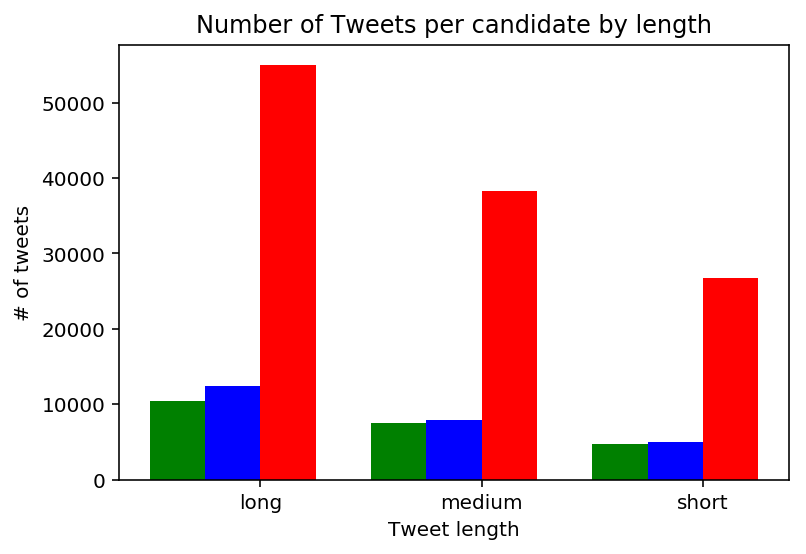

In [28]:
fig, ax = plt.subplots()
width = .5
x = np.array(range(0, 6, 2))

ax.bar(x, tl["clinton"], width, color='g')
ax.bar(x + width, tl["sanders"], width, color='b')
ax.bar(x + (width * 2), tl["trump"], width, color='r')

ax.set_ylabel('# of tweets')
ax.set_title('Number of Tweets per candidate by length')
ax.set_xticks(x + (width * 1.5))
ax.set_xticklabels(('long', 'medium', 'short'))
ax.set_xlabel('Tweet length')
plt.show()